In [ ]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

def get_center_of_mass(rho_field, L, cell_centered=True):
    """
    Compute center of mass for a 3D density field using trapezoidal integration
    ----------
    rho_field : ndarray
        3D density field (shape: nx, ny, nz).
    L : tuple of float
        Physical dimensions of the domain (Lx, Ly, Lz).
    cell_centered : bool
        If True, grid is cell based; else node based.
    Returns
    -------
    vec_com : numpy.ndarray
        Center of mass [x_cm, y_cm, z_cm].
    """
    nx, ny, nz = rho_field.shape
    if cell_centered:
        dx, dy, dz = L[0] / nx, L[1] / ny, L[2] / nz
        x = (np.arange(nx) + 0.5) * dx
        y = (np.arange(ny) + 0.5) * dy
        z = (np.arange(nz) + 0.5) * dz
    else:  # node-centered
        dx, dy, dz = L[0] / (nx - 1), L[1] / (ny - 1), L[2] / (nz - 1)
        x = np.arange(nx) * dx
        y = np.arange(ny) * dy
        z = np.arange(nz) * dz

    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    # Compute trapezoidal weights
    # wt = trapezoid_3d_weight(rho_field.shape)  # here we do not need to use trapezoidal weights
    wt = np.ones(rho_field.shape)

    # Total mass (weighted integral of density)
    mass = np.sum(rho_field * wt * dx * dy * dz)

    # Weighted coordinate integrals
    x_cm = np.sum(X * rho_field * wt * dx * dy * dz) / mass
    y_cm = np.sum(Y * rho_field * wt * dx * dy * dz) / mass
    z_cm = np.sum(Z * rho_field * wt * dx * dy * dz) / mass

    return np.array([x_cm, y_cm, z_cm])


yt : [INFO     ] 2025-09-27 10:14:58,981 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-09-27 10:14:58,982 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-09-27 10:14:58,984 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-09-27 10:14:58,985 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-09-27 10:14:59,099 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-09-27 10:14:59,100 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-09-27 10:14:59,103 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-09-27 10:14:59,103 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-09-27 10:14:59,105 Making a fixed resolution buffer of (('boxlib', 'phi_eq')) 800 by 800


[('boxlib', 'phi_eq')]



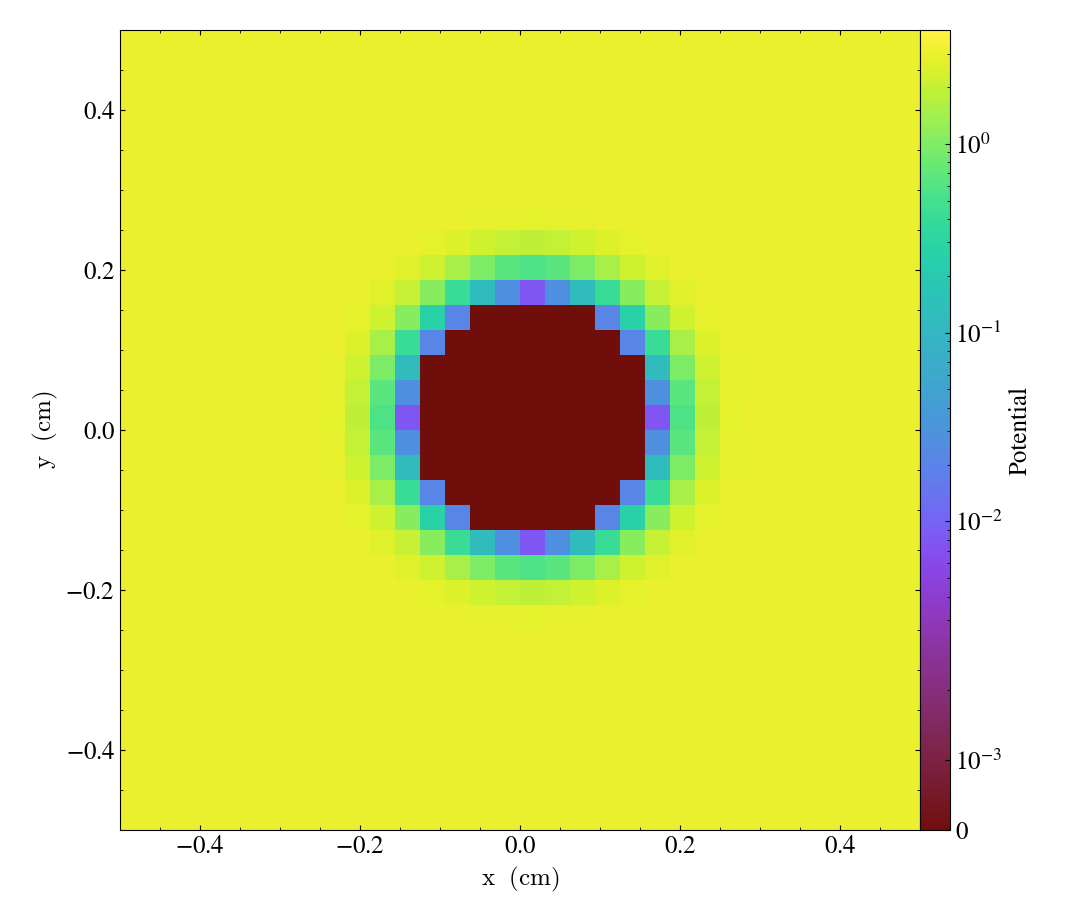

In [ ]:
#   Image Viewer


alpha0 = 1.5
r_init = 0.2
nx = 32
ny = 32
nz = 32

file_path_eq = "./data_droplet_alpha0_{:.2f}_r{:.2f}_size{:d}-{:d}-{:d}/equilibrium_phi_alpha0_{:.2f}_size32-32-32".format(alpha0, r_init, nx, ny, nz, alpha0)

ds = yt.load(file_path_eq)  # Or use a pattern like "plt*"
print(ds.field_list)
sl = yt.SlicePlot(ds, "z", "phi_eq")  # Make a 2D slice plot of component "comp0"
sl.set_zlim("phi_eq", 0., 4.0)

sl.set_colorbar_label("phi_eq", "Potential")
sl.show()
#print(ds.domain_left_edge, ds.domain_right_edge, ds.domain_dimensions)



In [ ]:
temperature = 1e-5
frameIdx = 40000 #1040000 #40000
file_path_fluctuating = "./data_droplet_alpha0_{:.2f}_r{:.2f}_size{:d}-{:d}-{:d}/lbm_data_shshan_alpha0_".format(alpha0, r_init, nx, ny, nz) + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/".format(nx, ny, nz) + "plt" + f"{frameIdx:07d}"
ds = yt.load(file_path_fluctuating)  # Or use a pattern like "plt*"
sl = yt.SlicePlot(ds, "z", "rho")  # Make a 2D slice plot of component "comp0"
sl.show()